In [232]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

In [233]:
results_path = './results/baseline'
results_files = os.listdir(results_path)
print(results_files)
# results_files = ['20230512_1646_oneplus_iedge_4g_tcp_480p.txt']

['20230515_1115_oneplus_iedge_5g_tcp_480p.txt', '20230515_1126_oneplus_iedge_5g_tcp_1080p.txt', '20230515_1137_oneplus_iedge_4g_tcp_480p.txt', '20230515_1149_oneplus_iedge_5g_udp_2k.txt', '20230515_1407_oneplus_iedge_5g_udp_720p.txt', '20230515_1417_oneplus_iedge_5g_udp_144p.txt', '20230515_1429_oneplus_iedge_4g_tcp_1080p.txt', '20230515_1512_oneplus_iedge_5g_udp_360p.txt', '20230515_1522_oneplus_iedge_5g_udp_4k.txt', '20230515_1534_oneplus_iedge_5g_tcp_2k.txt', '20230515_1545_oneplus_iedge_4g_udp_144p.txt', '20230515_1602_oneplus_iedge_4g_tcp_720p.txt', '20230515_1613_oneplus_iedge_4g_udp_2k.txt', '20230516_1053_oneplus_iedge_5g_tcp_4k.txt', '20230516_1144_oneplus_iedge_4g_tcp_144p.txt', '20230516_1310_oneplus_iedge_4g_udp_480p.txt', '20230516_1328_oneplus_iedge_4g_udp_720p.txt', '20230516_1413_oneplus_iedge_5g_tcp_360p.txt', '20230516_1425_oneplus_iedge_5g_udp_480p.txt', '20230516_1437_oneplus_iedge_5g_tcp_720p.txt', '20230516_1449_oneplus_iedge_4g_udp_1080p.txt', '20230516_1500_onep

In [234]:
useful_columns = ['QoS_Uplink Delay [ms]', 'QoS_Downlink Delay [ms]', 'Primary Pkt.Size [B]', 'Secondary Pkt.Size [B]',
                      'Primary Load [kb/s]', 'Secondary Load [kb/s]', 'QoS_Uplink Total Pkt loss', 
                      'QoS_Downlink Total Pkt loss', 'QoS_Uplink Jitter(MA) [ms]', 'QoS_Downlink Jitter(MA) [ms]']

In [235]:
combined_results = pd.DataFrame()
for results_file in results_files:
    print(results_file)
    with open(f'{results_path}/{results_file}') as f:
        results = [line for line in f.readlines()]
    
    general_col_names = pd.DataFrame([results[18]]).iloc[:, 0].str.split('\t',expand=True)
    data_col_names = pd.DataFrame([results[19]]).iloc[:, 0].str.split('\t',expand=True)

    new_cols = []
    general_col_prefix = ''
    for i in general_col_names:
        curr_general_col_name = general_col_names[i][0]
        curr_data_col_name = data_col_names[i][0]
        if len(curr_general_col_name) > 1:
            general_col_prefix = curr_general_col_name.split(' ')[0].replace(',', '')
            if 'QoS' in general_col_prefix:
                direction = curr_general_col_name.split(' ')[1]
                general_col_prefix = f'{general_col_prefix}_{direction}'
        new_col_name = f'{general_col_prefix} {curr_data_col_name}'
        new_cols.append(new_col_name)
    new_cols.append(' ')
    
    df = pd.DataFrame(results[18:])
    df = df.iloc[:, 0].str.split('\t',expand=True)
    
    df.columns = new_cols
    df = df.drop(df.index[[0, 1]])
    
    # for every file read in, I want to add the following columns:
    # datetime, network type, primary device, secondary device, protocol, resolution
    
    # read the file name and select out this data
    file_name_split = results_file.split('_')
    file_name_split[-1] = file_name_split[-1].split(".")[0]
    
    df_len = df.size
    
    new_col_series = pd.Series([file_name_split])
#     new_col = new_col_series.repeat(df_len)
    new_col_df = pd.DataFrame(new_col_series)

    new_col_df_split = pd.DataFrame(new_col_df[0].to_list(), columns=['Date', 'Time', 'Primary Device', 
                                                                      'Secondary Device', 'Network Type', 'Protocol', 
                                                                      'Resolution'])
    
#     df = pd.concat([new_col_df_split, df], axis=1)
    
    # for every file, reduce the results down
    useful_df = df[useful_columns]
    useful_df = useful_df.apply(pd.to_numeric, errors='coerce')

    median = pd.DataFrame(useful_df.median()).transpose()
    std = useful_df.std()
        
    analysed_data = pd.concat([new_col_df_split, median], axis=1)    
    combined_results = pd.concat([combined_results, analysed_data], axis=0)


20230515_1115_oneplus_iedge_5g_tcp_480p.txt
20230515_1126_oneplus_iedge_5g_tcp_1080p.txt
20230515_1137_oneplus_iedge_4g_tcp_480p.txt
20230515_1149_oneplus_iedge_5g_udp_2k.txt
20230515_1407_oneplus_iedge_5g_udp_720p.txt
20230515_1417_oneplus_iedge_5g_udp_144p.txt
20230515_1429_oneplus_iedge_4g_tcp_1080p.txt
20230515_1512_oneplus_iedge_5g_udp_360p.txt
20230515_1522_oneplus_iedge_5g_udp_4k.txt
20230515_1534_oneplus_iedge_5g_tcp_2k.txt
20230515_1545_oneplus_iedge_4g_udp_144p.txt
20230515_1602_oneplus_iedge_4g_tcp_720p.txt
20230515_1613_oneplus_iedge_4g_udp_2k.txt
20230516_1053_oneplus_iedge_5g_tcp_4k.txt
20230516_1144_oneplus_iedge_4g_tcp_144p.txt
20230516_1310_oneplus_iedge_4g_udp_480p.txt
20230516_1328_oneplus_iedge_4g_udp_720p.txt
20230516_1413_oneplus_iedge_5g_tcp_360p.txt
20230516_1425_oneplus_iedge_5g_udp_480p.txt
20230516_1437_oneplus_iedge_5g_tcp_720p.txt
20230516_1449_oneplus_iedge_4g_udp_1080p.txt
20230516_1500_oneplus_iedge_4g_udp_4k.txt
20230516_1511_oneplus_iedge_5g_udp_1080p.

In [236]:
pd.pandas.set_option('display.max_columns', None)
df.head()


,General Meas. time [s],General Timestamp [s],General Ctrl pk num,General True Avg.Per. [ms],Primary Latitude,Primary Longitude,Primary Altitude,Primary Position mode,Primary Position age,Primary Position accuracy [m],Primary RSSI [dBm],Primary RSRP [dBm],Primary RSRQ [dB],Primary SINR [dB],Primary Cell ID,Primary BS MAC address,Primary Network type,Primary Dropped by If [pkts],Primary Dropped by Pcap [pkts],Primary Malformed [pkts],Primary Short [pkts],Primary Load [kb/s],Primary Load [pkts/s],Primary Total bytes,Primary Total pkts,Primary Pkt.Size [B],Primary Protocol,Primary Duplicates,Primary Load [kb/s],Primary Load [pkts/s],Primary Total bytes,Primary Total pkts,Primary Pkt.Size [B],Primary Protocol,Primary Duplicates,Secondary Latitude,Secondary Longitude,Secondary Altitude,Secondary Position accuracy[m],Secondary RSSI [dBm],Secondary RSRP [dBm],Secondary RSRQ [dB],Secondary SINR [dB],Secondary Cell ID,Secondary BS MAC address,Secondary Network type,Secondary Dropped by If [pkts],Secondary Dropped by Pcap [pkts],Secondary Malformed [pkts],Secondary Short [pkts],Secondary Load [kb/s],Secondary Load [pkts/s],Secondary Total bytes,Secondary Total pkts,Secondary Pkt.Size [B],Secondary Protocol,Secondary Duplicates,Secondary Load [kb/s],Secondary Load [pkts/s],Secondary Total bytes,Secondary Total pkts,Secondary Pkt.Size [B],Secondary Protocol,Secondary Duplicates,QoS_Uplink Pkt loss,QoS_Uplink Total Pkt loss,QoS_Uplink Delay samples,QoS_Uplink Delay [ms],QoS_Uplink Delay(max) [ms],QoS_Uplink Delay(min) [ms],QoS_Uplink Jitter(MA) [ms],QoS_Uplink Jitter(abs.) [ms],QoS_Uplink Jitter(max) [ms],QoS_Uplink Exceeded delay th. [pkts],QoS_Uplink Exceeded jitter th. [pkts],QoS_Uplink GQoSM,QoS_Uplink PSQA,QoS_Uplink Conn. break dur. [s],QoS_Uplink Conn. break length [pkts],QoS_Uplink Conn. break count,QoS_Uplink Max Conn break [s],QoS_Uplink Sent not found [pkts],QoS_Downlink Pkt loss,QoS_Downlink Total Pkt loss,QoS_Downlink Delay samples,QoS_Downlink Delay [ms],QoS_Downlink Delay(max) [ms],QoS_Downlink Delay(min) [ms],QoS_Downlink Jitter(MA) [ms],QoS_Downlink Jitter(abs.) [ms],QoS_Downlink Jitter(max) [ms],QoS_Downlink Exceeded delay th. [pkts],QoS_Downlink Exceeded jitter th. [pkts],QoS_Downlink GQoSM,QoS_Downlink PSQA,QoS_Downlink Conn. break dur .[s],QoS_Downlink Conn. break length [pkts],QoS_Downlink Conn. break count,QoS_Downlink Max Conn break [s],QoS_Downlink Sent not found [pkts]\n,
2,1,1684324108.246558,1,1002.000000,N/A,N/A,N/A,None,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,0,0,0,9.405190,11.976048,1178,12,98,17,0,6.970060,7.984032,873,8,109,6,0,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,0,0,0,4.351297,3.992016,545,4,136,6,0,4.055888,5.988024,508,6,84,6,0,0.000000,0.000000,2,12.084000,12.360000,11.808000,0.551000,0.275000,0.551000,0,0,N/A,N/A,0.000000,0,0,N/A,0,0.000000,0.000000,3,10.776000,14.117000,7.920000,3.736000,2.065000,3.827000,0,0,N/A,N/A,0.000000,0,0,N/A,0,\n
3,2,1684324109.246526,2,1000.000000,N/A,N/A,N/A,None,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,0,0,0,10.056000,9.000000,2435,21,139,17,0,6.960000,7.000000,1743,15,124,6,0,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,0,0,0,6.080000,5.000000,1305,9,152,6,0,5.472000,8.000000,1192,14,85,6,0,0.375000,0.375000,5,14.431000,15.775000,11.445000,0.828000,1.557000,3.414000,0,0,N/A,N/A,0.053783,1,2,0.063527,0,0.000000,0.000000,5,9.097000,12.300000,7.297000,3.357000,2.270000,5.002000,0,0,N/A,N/A,0.000000,0,0,N/A,2,\n
4,3,1684324110.246540,3,1000.000000,N/A,N/A,N/A,None,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,0,0,0,10.904000,10.000000,3798,31,136,17,0,6.808000,7.000000,2594,22,121,6,0,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0,0,0,0,5.624000,5.000000,2008,14,140,17,0,4.608000,7.000000,1768,21,82,17,0,0.333333,0.357143,4,13.387000,15.505000,11.255000,1.099000,2.084000,4.249000,0,0,N/A,N/A,0.233182,2,1,0.233182,0,0.000000,0.000000,5,10.645000,16.112000,8.598000,3.459000,3.585000,7.513000,0,0,N/A,N/A,0.000000,0,0,N/A,0,\n
5,4,1684324111.246572,4,1000.000000,N/A,N/A,N/A,None,N/A

In [237]:
print(combined_results)

       Date  Time Primary Device Secondary Device Network Type Protocol  \
0  20230515  1115        oneplus            iedge           5g      tcp   
0  20230515  1126        oneplus            iedge           5g      tcp   
0  20230515  1137        oneplus            iedge           4g      tcp   
0  20230515  1149        oneplus            iedge           5g      udp   
0  20230515  1407        oneplus            iedge           5g      udp   
0  20230515  1417        oneplus            iedge           5g      udp   
0  20230515  1429        oneplus            iedge           4g      tcp   
0  20230515  1512        oneplus            iedge           5g      udp   
0  20230515  1522        oneplus            iedge           5g      udp   
0  20230515  1534        oneplus            iedge           5g      tcp   
0  20230515  1545        oneplus            iedge           4g      udp   
0  20230515  1602        oneplus            iedge           4g      tcp   
0  20230515  1613        

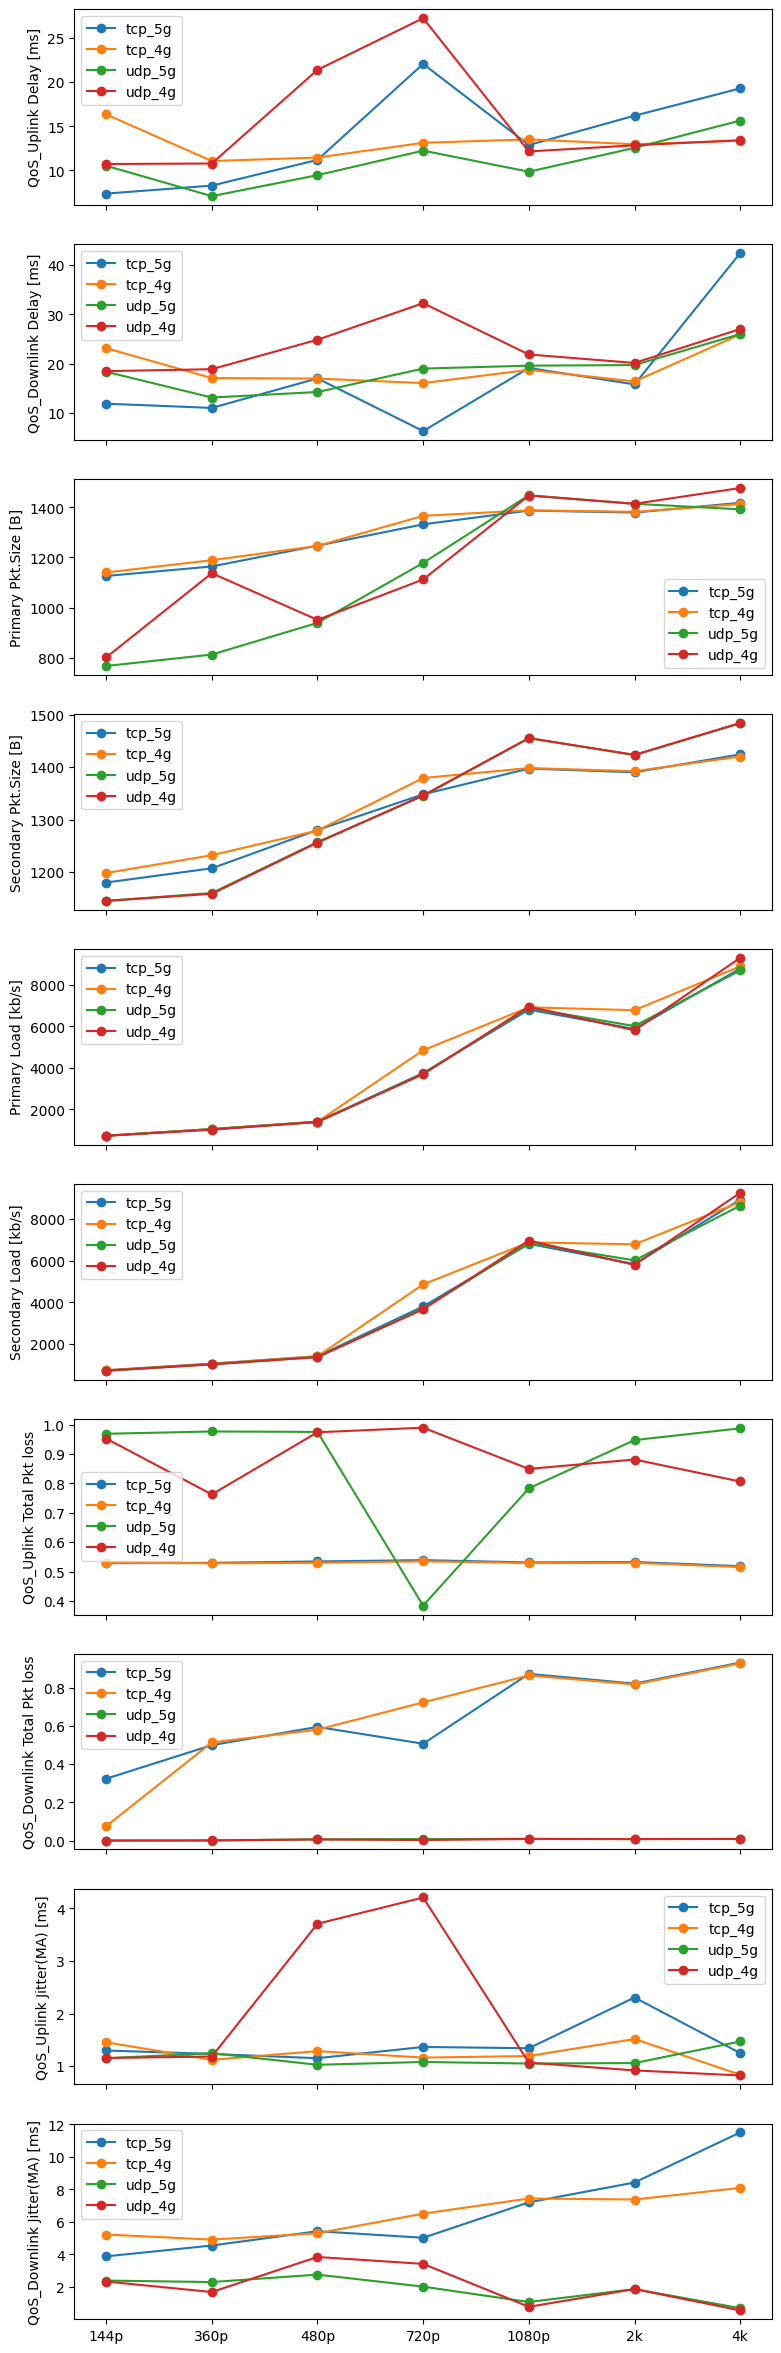

In [238]:
# analysing for uplink and downlink delay 

results = {
    'protocols': ['tcp', 'udp'],
    'network_type': ['5g', '4g'],
    'graphs': useful_columns
}

# combined_results.plot(x='Resolution', y=['QoS_Uplink Delay [ms]', 'QoS_Downlink Delay [ms]'])

# plot data with resolution on the x-axis, and delays in the y-axis

# I should filter the data, I need to filter also by the network type, protocol, and uplink/downlink
# results_tcp = combined_results[combined_results['Protocol'].str.contains('tcp')]
# results_udp = combined_results[combined_results['Protocol'].str.contains('udp')]

# tcp_5g = results_tcp[results_tcp['Network Type'].str.contains('5g')]
# tcp_4g = results_tcp[results_tcp['Network Type'].str.contains('4g')]

# udp_5g = results_udp[results_udp['Network Type'].str.contains('5g')]
# udp_4g = results_udp[results_udp['Network Type'].str.contains('4g')]

fig, axs = plt.subplots(len(results['graphs']), 1, figsize=[9, 30], sharex=True)

resolution_order = ['144p', '360p', '480p', '720p', '1080p', '2k', '4k']

combined_results['Resolution'] = pd.Categorical(combined_results['Resolution'], categories=resolution_order, ordered=True)
combined_results.sort_values('Resolution', inplace=True)

for protocol in results['protocols']:
    for network in results['network_type']:
        curr_results_protocol = combined_results[combined_results['Protocol'].str.contains(protocol)]
        curr_results_network = curr_results_protocol[curr_results_protocol['Network Type'].str.contains(network)]
        
        for i in range(len(results['graphs'])):
            curr_graph_key = results['graphs'][i]
#             print(curr_graph_key, protocol, network)
            
            curr_y_plot = curr_results_network[curr_graph_key]
            if curr_graph_key == 'Primary Pkt.Size [B]' or curr_graph_key == 'Primary Load [kb/s]':
                curr_y_plot = curr_results_network[curr_graph_key].iloc[:,1]
            elif curr_graph_key == 'Secondary Pkt.Size [B]'  or curr_graph_key == 'Secondary Load [kb/s]':
                curr_y_plot = curr_results_network[curr_graph_key].iloc[:,0]
#             print(curr_results_network)

            axs[i].plot(curr_results_network['Resolution'], curr_y_plot, '-o', label=f'{protocol}_{network}')
#         axs[1].scatter(curr_results_network['Resolution'], curr_results_network['QoS_Downlink Delay [ms]'], label=f'{protocol}_{network}')
        
#             axs[i].set_xticklabels(resolution_order)
            
            axs[i].set_ylabel(curr_graph_key)
            axs[i].legend()

        

# axs.legend()


In [224]:
useful_df = df[useful_columns]
useful_df = useful_df.apply(pd.to_numeric, errors='coerce')

median = useful_df.median()
std = useful_df.std()

print(median)
print('\n')

print(std)


QoS_Uplink Delay [ms]      11.0335
QoS_Downlink Delay [ms]    17.7005
Primary RSSI [dBm]             NaN
Primary RSRP [dBm]             NaN
Primary RSRQ [dB]              NaN
Primary SINR [dB]              NaN
dtype: float64


QoS_Uplink Delay [ms]      1.685294
QoS_Downlink Delay [ms]    1.012783
Primary RSSI [dBm]              NaN
Primary RSRP [dBm]              NaN
Primary RSRQ [dB]               NaN
Primary SINR [dB]               NaN
dtype: float64
